## Import necessary packages and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix

## Load the dataset
We will be using the wisconsin breast cancer dataset from UCI repository

In [32]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
        'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
        'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

# Drop 'id' column as it is not a useful feature for classification
df.drop(columns=['id'], inplace=True)

# Replace missing data
df.replace('?',-99999, inplace=True)

## Some additional insight into dataset

In [33]:
print('metadata of our dataset\n')
print(df.axes)
print('\n\n')
print('example datapoint\n')
print(df.loc[0])
print('\n\n')
print('shape of our dataframe\n')
print(df.shape)
print('\n\n')
print('summary of different features in data\n')
print(df.describe())

metadata of our dataset

[RangeIndex(start=0, stop=699, step=1), Index([u'clump_thickness', u'uniform_cell_size', u'uniform_cell_shape',
       u'marginal_adhesion', u'single_epithelial_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses', u'class'],
      dtype='object')]



example datapoint

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object



shape of our dataframe

(699, 10)



summary of different features in data

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1

## Plot histograms of features
This gives us an idea of distribution of all the features

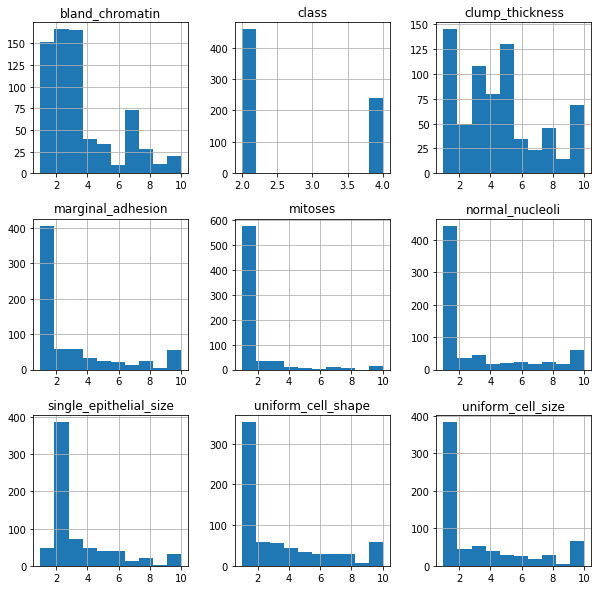

In [34]:
df.hist(figsize=(10, 10))
plt.show()

## Scatter plot matrix for features
Helps us understand the suitability of different types of classifiers for our classification problem 
e.g: Linear classifier is not suited for data with features of high non-linear correlation

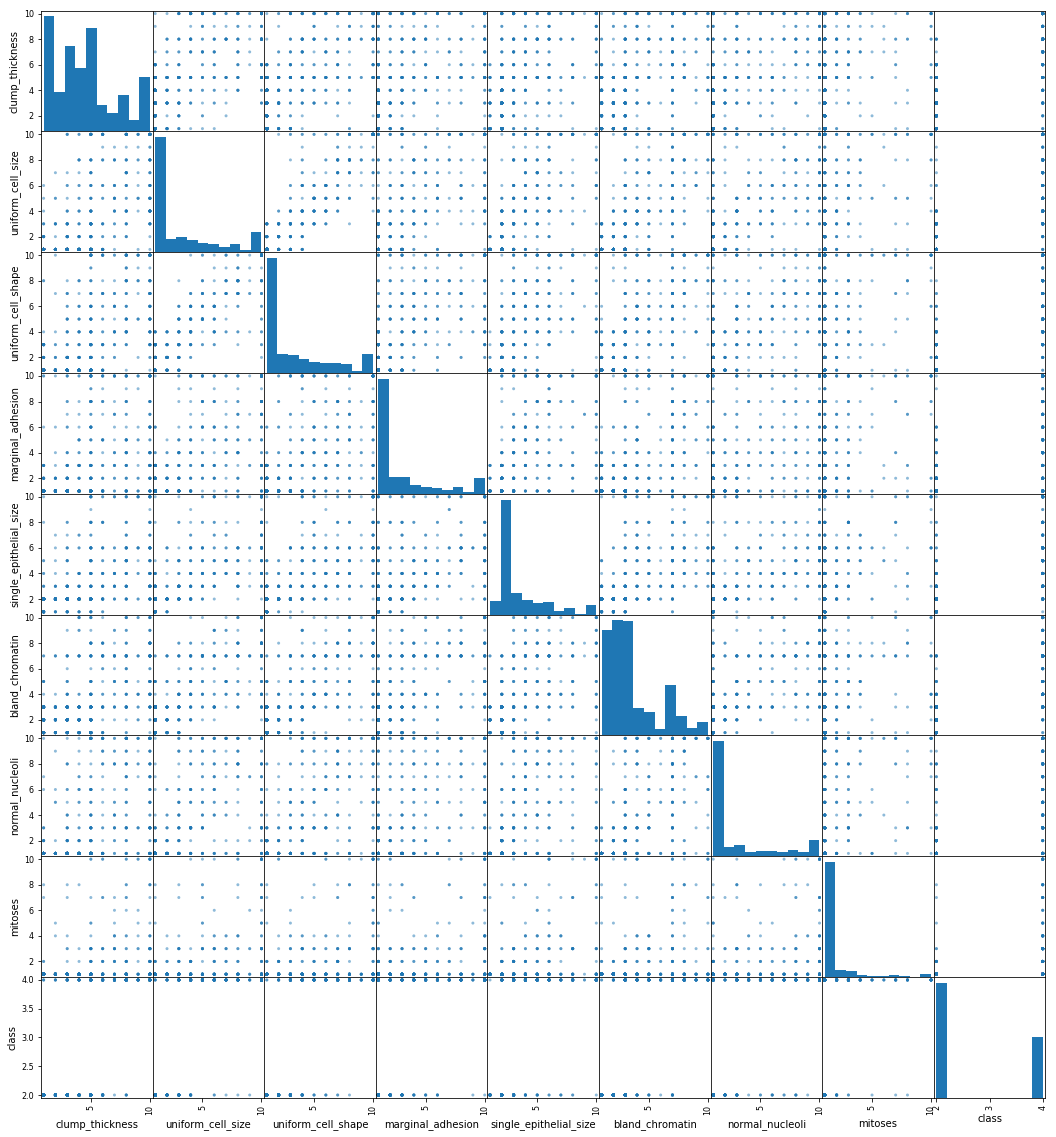

In [35]:
scatter_matrix(df, figsize=(18, 20))
plt.show()

## Split the data into train and test sets
Utilizing the helper function provided by sklearn to create a good split. Find the documentation <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">here</a>

In [36]:
# Convert the data into numpy arrays split between explanatory variables and response variable
X = np.array(df.drop(columns=['class']))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [37]:
# Setting up random seed and evaluation metrics
seed = 10
metric = 'accuracy'

## Defining models to train
We will define kNN and SVM models

In [38]:
models = []
models.append(('kNN', KNeighborsClassifier(n_neighbors=8)))
models.append(('SVM', SVC()))

## Evaluating different models using k-fold cross validation

In [39]:
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_res = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric)
    results.append(cv_res)
    names.append(name)
    print("{0}: {1} ({2})".format(name, str(cv_res.mean()), str(cv_res.std())))

kNN: 0.963265306122449 (0.03957289679523534)
SVM: 0.9590986394557823 (0.0258157719550017)


/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Model Evaluation
<ul>
    <li>Fit different models on training data</li>
    <li>Predict the labels with the trained model on test data</li>
    <li>Print out the evaluation metrics for different models</li>
</ul>

In [40]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

kNN
0.9761904761904762
              precision    recall  f1-score   support

           2       0.99      0.98      0.98       148
           4       0.95      0.97      0.96        62

   micro avg       0.98      0.98      0.98       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210

SVM
0.9285714285714286
              precision    recall  f1-score   support

           2       1.00      0.90      0.95       148
           4       0.81      1.00      0.89        62

   micro avg       0.93      0.93      0.93       210
   macro avg       0.90      0.95      0.92       210
weighted avg       0.94      0.93      0.93       210

